In [33]:
len=3
for i in range(len-1):
    print(i+1)

1
2


In [13]:
import pandas as pd 
import numpy as np 
import os
os.getcwd()  
os.chdir('D:/迅雷下载/华南农业大学_柑橘病虫害识别挑战赛/初赛/训练集/labels/')  
path = 'D:/迅雷下载/华南农业大学_柑橘病虫害识别挑战赛/初赛/训练集/labels/'
os.listdir(path)

datalist = []
for i in os.listdir(path):
    if os.path.splitext(i)[1] == '.txt':   
        datalist.append(i)

df = pd.DataFrame(columns=['image_id', 'type', 'x','y','h','w'])
df.head()
dates = pd.read_csv('D:/迅雷下载/华南农业大学_柑橘病虫害识别挑战赛/初赛/训练集/labels/1.txt',sep='\s+',header=None)
#print(dates.iat[0,1])

for txt in datalist:
    data_path = os.path.join(path,txt)  
    datas=pd.read_csv(data_path,sep='\s+',header=None)
    len=int(datas.shape[0])
    for i in range(len-1):
        m=re.sub('[.txt]','',str(txt))
        df=df.append({'image_id':m,'type':datas.iat[i,0],'x':datas.iat[i,1],'y':datas.iat[i,2],'h':datas.iat[i,3],'w':datas.iat[i,4]},ignore_index=True)

print(df.head(5))  
print(df.shape)  
df.isnull().sum()  
df.duplicated().sum() 

#df.to_csv('D:/迅雷下载/华南农业大学_柑橘病虫害识别挑战赛/初赛/训练集/labels/sample_submission.csv',index=False)

  image_id type         x         y         h         w
0    0725)    0  0.489387  0.482353  0.076258  0.376471
1        1    0  0.560429  0.589744  0.329435  0.307692
2        1    0  0.638402  0.251479  0.368421  0.475345
3      109    0  0.635086  0.421296  0.281415  0.218254
4      109    0  0.532738  0.712963  0.171296  0.320767
(1249, 6)


0

In [2]:
#导入包
import os
import gc
import re

import cv2
import math
import numpy as np
import scipy as sp
import pandas as pd

import tensorflow as tf
from IPython.display import SVG
import efficientnet.tfkeras as efn
from tensorflow.python.keras.utils.vis_utils import plot_model
import tensorflow.keras.layers as L
from tensorflow.python.keras.utils.vis_utils import model_to_dot
import tensorflow.keras.backend as K
from tensorflow.keras.models import Model
#from kaggle_datasets import KaggleDatasets
from tensorflow.keras.applications import DenseNet121

import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

tqdm.pandas()
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

np.random.seed(0)
tf.random.set_seed(0)

import warnings
warnings.filterwarnings("ignore")

In [21]:
#导入数据

EPOCHS=20
SAMPLE_LEN=int(522*0.4)
IMAGE_PATH="D:/preliminary contest/train/images/"
TEST_PATH=""
TRAIN_PATH="D:/preliminary contest/train/images//labels/"
SUB_PATH="D:/preliminary contest/train/images/sample_submission.csv"

train_data=df
print(train_data.head())
#sub=pd.read_csv(SUB_PATH)

#导入图片
def load_image(image_id):
    file_path=image_id+".jpg"
    image=cv2.imread(IMAGE_PATH+file_path)
    return cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
train_images=train_data["image_id"][:SAMPLE_LEN].progress_apply(load_image)

  2%|█▉                                                                                | 5/208 [00:00<00:07, 25.77it/s]

  image_id type         x         y         h         w
0    0725)    0  0.489387  0.482353  0.076258  0.376471
1        1    0  0.560429  0.589744  0.329435  0.307692
2        1    0  0.638402  0.251479  0.368421  0.475345
3      109    0  0.635086  0.421296  0.281415  0.218254
4      109    0  0.532738  0.712963  0.171296  0.320767


100%|████████████████████████████████████████████████████████████████████████████████| 208/208 [00:36<00:00,  5.77it/s]



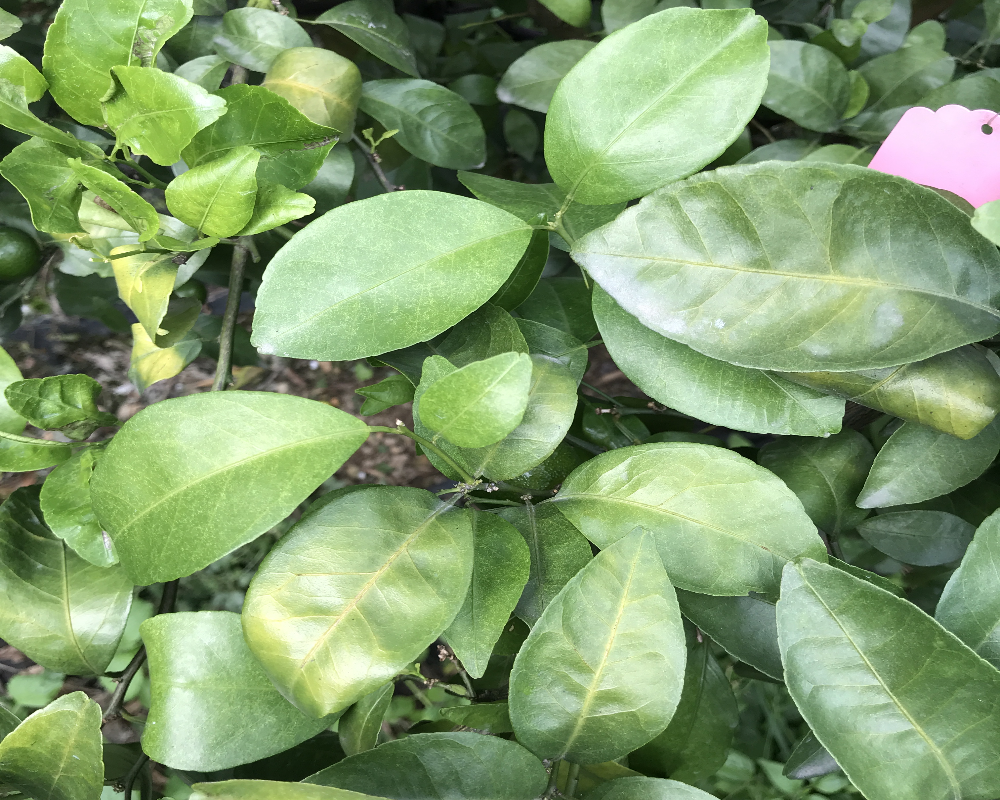

In [28]:
fig=px.imshow(cv2.resize(train_images[100],(1000,800)))
fig.show()